In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import date
import calendar
import folium
from matplotlib import gridspec

# Part 1: Temporal Patterns



In [2]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [3]:
df = df.drop(columns=['PdId','Descript','IncidntNum'])

In [4]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [5]:
df = df.where(df.Category.isin(focuscrimes))

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [7]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.weekday
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M")
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Time'] = df['Time'].dt.time


In [8]:
prostitution = df[df['Category'] == 'PROSTITUTION']

In [9]:
drunkdriving = df[df['Category'] == 'DRIVING UNDER THE INFLUENCE']

In [20]:
wl = df[df['Category'] == 'WEAPON LAWS']

In [21]:
rob = df[df['Category'] == 'ROBBERY']

In [22]:
bur = df[df['Category'] == 'BURGLARY']

In [23]:
drug = df[df['Category'] == 'DRUG/NARCOTIC']

Text(0.5, 1.0, 'PROSTITUTION')

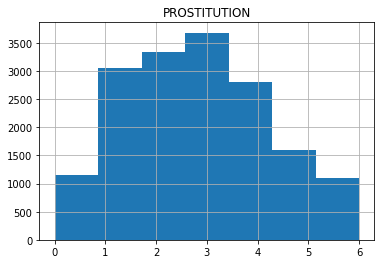

In [25]:
prostitution_plot = prostitution['WeekDay'].hist(bins=7)
prostitution_plot.set_title('PROSTITUTION')


Text(0.5, 1.0, 'DRIVING UNDER THE INFLUENCE')

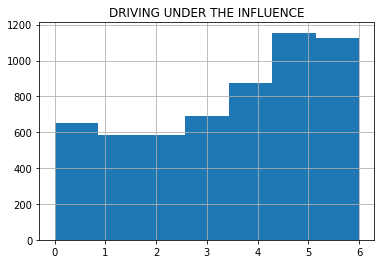

In [19]:
drunkdriving_plot = drunkdriving['WeekDay'].hist(bins=7)
drunkdriving_plot.set_title('DRIVING UNDER THE INFLUENCE')

Text(0.5, 1.0, 'BURGLARY')

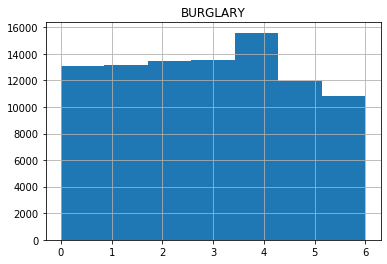

In [56]:

bur_plot = bur['WeekDay'].hist(bins=7)
bur_plot.set_title('BURGLARY')

In [55]:
#fig, ax=plt.subplots(nrows=2,ncols=3)
#fig.set_size_inches(20,5)
#fig.subplots_adjust(wspace=0.4)
#ax[0,0] = drunkdriving['WeekDay'].hist(bins=7)
#ax[0,0].text(0.5,0.5,str(('DRIVING UNDER THE INFLUENCE')),fontsize=14)
#ax[0,1] = wl['WeekDay'].hist(bins=7)
#ax[0,1].text(0.5,0.5,str(('WEAPON LAWS')),fontsize=14)


(array([1143., 3054., 3332., 3680., 2803., 1598., 1091.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

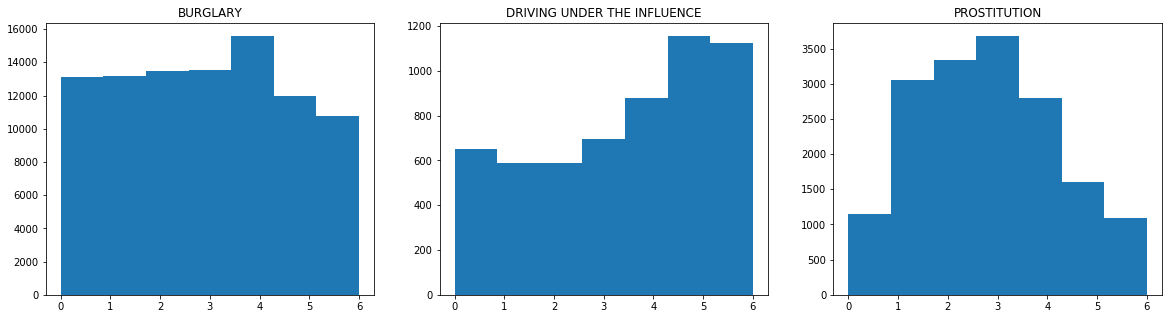

In [59]:
fig, ax=plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,5)
plt.subplot(1,3,1)
plt.title('BURGLARY')
plt.hist(bur['WeekDay'],bins=7)
plt.subplot(1,3,2)
plt.title('DRIVING UNDER THE INFLUENCE')
plt.hist(drunkdriving['WeekDay'],bins=7)
plt.subplot(1,3,3)
plt.title('PROSTITUTION')
plt.hist(prostitution['WeekDay'],bins=7)


(array([1651., 1446., 1331., 1517., 1386., 1211., 1262., 1315., 1544.,
        1371., 1388., 1279.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

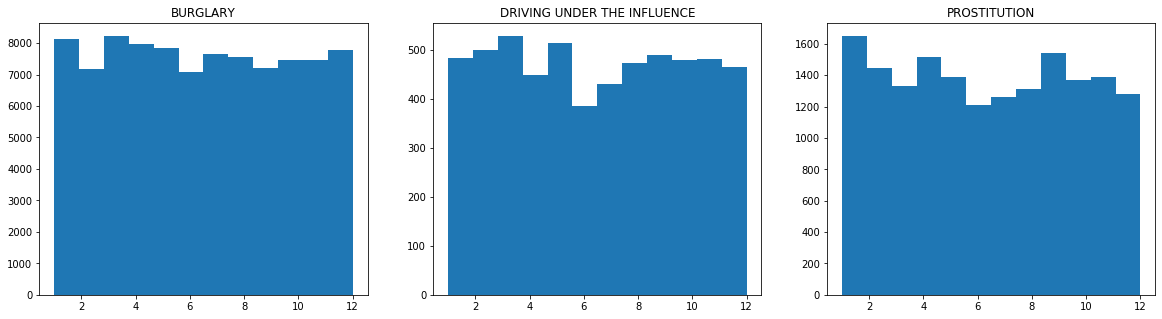

In [60]:
fig, ax=plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,5)
plt.subplot(1,3,1)
plt.title('BURGLARY')
plt.hist(bur['Month'],bins=12)
plt.subplot(1,3,2)
plt.title('DRIVING UNDER THE INFLUENCE')
plt.hist(drunkdriving['Month'],bins=12)
plt.subplot(1,3,3)
plt.title('PROSTITUTION')
plt.hist(prostitution['Month'],bins=12)

In [111]:
bur1 = bur.groupby((bur['WeekDay']) * 24 + (bur['Hour'])).mean().rename_axis('HourOfWeek')
drunkdriving1 = drunkdriving.groupby((drunkdriving['WeekDay']) * 24 + (drunkdriving['Hour'])).mean().rename_axis('HourOfWeek')
prostitution1 = prostitution.groupby((prostitution['WeekDay']) * 24 + (prostitution['Hour'])).mean().rename_axis('HourOfWeek')

In [4]:
#fig, ax=plt.subplots(nrows=1,ncols=3)
#fig.set_size_inches(20,5)
#plt.subplot(1,3,1)
#plt.title('BURGLARY')
#plt.hist(bur1['HourOfWeek'],bins=168)
#plt.subplot(1,3,2)
#plt.title('DRIVING UNDER THE INFLUENCE')
#plt.hist(drunkdriving1['HourOfWeek'],bins=168)
#plt.subplot(1,3,3)
#plt.title('PROSTITUTION')
#plt.hist(prostitution1['HourOfWeek'],bins=168)

# Part 2: Thinking about data and visualization

* **What is the difference between data and metadata? How does that relate to the bike-example?**

If you consider a dataset , the data is the actual entries in the dataset, whereas metadata is data regarding the dataset, such as number of entries, how frequent the data was optained, or where it was optained. Just by using the metadata from a Smartwatch it is possible to plot when the owner was likely to go running or biking, from just the GPS's latitude and longitude.

* **Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.**

The human eye is definitely a great tool. The human eye is good at catagorization, which is essentially pattern recognizion, however it is even better at finding things that don't fit in, such as outliers. One example of this is CGI, more specifically CGI humans, even though the eye might not be able to point out why, it can instantly tell if something is off.
The human eye is prone to bias or tunnelvision, which might lead us miss something important. An example of this is the selective attention test by Daniel Simons and Christopher Chabris: https://www.youtube.com/watch?v=vJG698U2Mvo
In the test six people pass two basket balls around and you are supposed to count the passes. However while doing so you will likely fail to notice the guy in a gorilla costume walking through the middle of the screen.



* **Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**

An example of the Simpson's paradox could be that a friend and I played Mine Sweeper two days in a row.
On the first day i play two games of which I win one. My friend plays ten games and wins six.
On the second day i play ten games and win nine. My friend plays two games and wins both. seperately my friend has a higher succesrate both days, but when looking at the total successrate, mine is higher.

   Day 1: Me: 1/2 = 50% Friend: **6/10 = 60%**
   
   Day 2: Me 9/10 = 90% Friend: **2/2 = 100%**
    
   Combined: Me: **10/12 = 83.3%** Friend: 8/12 = 66.6%   


* **In your own words, explain the difference between exploratory and explanatory data analysis.**

Exploratory data analysis is the main way to do new research. It can be used to learn new things about the data, which can be used to form a hypothesis. Explanatory data analysis on the other hand is useful for communicating something about the data, that you already know (maybe something that follows a hypothesis from an exploratory data analysis) in a way that is easy to understand for others.

* **As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?**

The Pearson correlation describes how well the values of X and Y correlate in the form of a value between -1 and 1. -1 indicate a perfect inverse correlation, 0 indicates no correlation whatsoever and 1 indicates perfect correlation. 

$$rX,Y = \frac{{}\sum_{i=1}^{n} (X_i - \overline{X})(Y_i - \overline{Y})}
{\sqrt{\sum_{i=1}^{n} (X_i - \overline{X})^2(Y_i - \overline{Y})^2}}$$

Pearson correlation describes the linear relationship between the two variables, so in case of a non-linear relation between X and Y, Pearson correlation will likely fail, whereas it possibly would be revealed by visualization.  

* **What is the difference between a bar-chart and a histogram?**

In a bar-chart each bar represents a single value such as a country, a name or a year whereas in a histogram each bar represents a bin or a group of values. These groups can be based on age-groups, BMI, coffee consumption, anything really and it can provide great insight to correlations or trends, which makes it a great tool for data analysis.      

* **I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.**

A fast way of deciding the bin size is by using Sturge's Rule: $K = 3.322 log_N$
Where K is the number of bins and N the number of obervations in the set. Sturge's Rule is most effective when working with continuos, symmetrical data that is normally destributed rather than skewed.

# Part 3: Generating important plot types

In [10]:
police_data = pd.read_csv('../police_data.csv')

In [11]:
police_data = police_data.drop(columns=['PdId','Descript','IncidntNum'])

In [12]:
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']

In [13]:
police_data = police_data.where(police_data.Category.isin(focuscrimes))

In [14]:
police_data['Date'] = pd.to_datetime(police_data['Date'], format="%m/%d/%Y")

In [15]:
police_data = police_data[police_data['Date'] >= '2013-01-01']

In [16]:
police_data['Month'] = police_data['Date'].dt.month
police_data['Year'] = police_data['Date'].dt.year
police_data['Day'] = police_data['Date'].dt.day
police_data['Time'] = pd.to_datetime(police_data['Time'], format="%H:%M")
police_data['Hour'] = police_data['Time'].dt.hour
police_data['Minute'] = police_data['Time'].dt.minute
police_data['Time'] = police_data['Time'].dt.time

In [17]:
robberies = police_data[police_data['Category'] == 'ROBBERY']
drunk = police_data[police_data['Category'] == 'DRUNKENNESS']
dui = police_data[police_data['Category'] == 'DRIVING UNDER THE INFLUENCE']
conduct = police_data[police_data['Category'] == 'DISORDERLY CONDUCT']

In [18]:
hourly_reports = robberies.loc[(robberies['Hour'] >= 14) & (robberies['Hour'] <= 15)]

# Jitter plot of report times

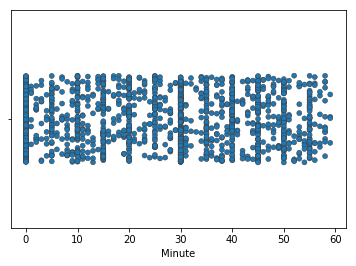

In [19]:
ax = sns.stripplot(x=hourly_reports['Minute'], jitter=0.20, linewidth=0.5)

Here we see a definite pattern in the data. Reports seem to come in 5 minute intervals, with some falling in between and the most action occurs around whole hours and half hours.

# GPS based histograms of crime data

In [20]:
dui_lat = dui['X']
conduct_lat = conduct['X']
robbery_lat = robberies['X']

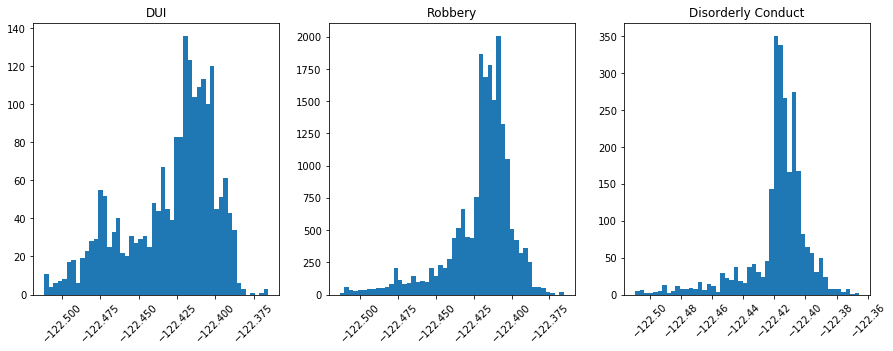

In [53]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.hist(dui_lat,bins=50);
ax.title.set_text('DUI')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax2.hist(robbery_lat,bins=50);
ax2.title.set_text('Robbery')
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

ax3.hist(conduct_lat,bins=50);
ax3.title.set_text('Disorderly Conduct')
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

**Histograms of crimes based on longitude**

Here, a pattern arises in all three histograms. Most of the crimes happen within certain longitudes, with crime 'emanating out' from the locations. Disorderly conducts seem be be very location specific, while robberies spread out a little bit more. DUI's are interesting; while they do bunch together around certain longitudes, they are much spread out than robberies or disorderly conduct. This might be because of the 'mobile' nature of the crime. 

# KDE plot of report-times

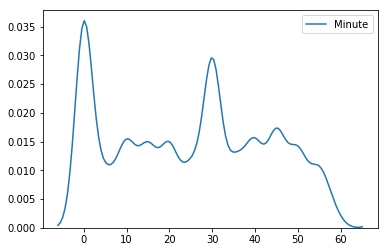

In [23]:
ax = sns.kdeplot(data=hourly_reports['Minute'],bw=2)

**KDE plot of hourly report times**

You can gather some of the same insight from this figure as you could with the jitter-plot; cops prefer reporting crimes at specific intervals. However, depending on the bandwidth used, it's certainly harder to spot the exact pattern seen in the jitter-plot, where you could pinpoint the reports to 5 minute intervals. Even with a lower bandwidth, you don't get the granularity of the jitter-plot.

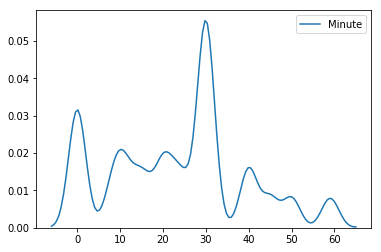

In [23]:
smaller_dataset = hourly_reports.sample(n=25)
ax = sns.kdeplot(data=smaller_dataset['Minute'],bw=2)

**KDE plot with sample size of 25**

KDE plots can most certainly misrepresent the data, and depending on what kernel size and bandwidth one uses, KDEs can introduce patterns that are not really there to begin with. Using a higher bandwidth can exacerbate this misrepresentation. 

In [1]:
#get narcotics data
data = pd.read_csv("D:/Social data 02806/Notebooks/week1/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
#Convert string data to dateTime format
data['Date']=pd.to_datetime(data['Date'],format='%m/%d/%Y')



# Part 4 Heatmaps of geo-data

*Exercise: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials).*

*Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.*

* *First start by plotting a map of San Francisco with a nice tight zoom.*
* *Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker.*

We create a map at the coordinates of San Francisco and places the marker for the city hall.

In [12]:
map_1 = folium.Map([37.77919, -122.41914],tiles = "Stamen Toner", zoom_start=13)
folium.Marker([37.77919, -122.41914], popup='SF City Hall').add_to(map_1)

map_1 # Calls the map to display

* *Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months.*

We start by extracting the data we want to plot

In [24]:
# extract drug data for period Jan 1st to Jan 10th
drugData = data.loc[data['Category'] == 'DRUG/NARCOTIC']
drugData = drugData.set_index(['Date'])
drugData = drugData.loc['2015-1-1':'2015-1-10']

Next Lets plot the data

In [25]:
map_2 = folium.Map([37.77919, -122.41914],tiles = "Stamen Toner", zoom_start=13)

for index, row in drugData.iterrows():
    folium.Marker([row['Y'],row['X']]).add_to(map_2)

map_2

Next we are going to have a look at heatmaps

* *To create your first heatmap, grab all arrests for the category 'SEX OFFENSES, NON FORCIBLE' across all time. Play with parameters to get plots you like.*

In [26]:
# extract 'SEX OFFENSES, NON FORCIBLE'
sexData = data.loc[data['Category'] == 'SEX OFFENSES, NON FORCIBLE']


In [60]:
from folium.plugins import HeatMap
map_3 = folium.Map([37.77919, -122.41914],tiles = "Stamen Toner", zoom_start=13)

heat_data = [[row['Y'],row['X']] for index, row in sexData.iterrows()]
# Plot it on the map
HeatMap(heat_data, radius = 20,blur=7, max_zoom =16, gradient ={0.8: 'blue', 0.85: 'lime', 1: 'red'}).add_to(map_3)

map_3

* *Now, comment on the differences between scatter plots and heatmaps.*

**Diferences between Scatter plots and Heat Maps**

Scatter plots are good at displaying individual cases, but when the density is high it is imposibble to see how many cases there are in an area.
Heat maps are good for displaying this density, but it is bad at showing the individual cases.


* *Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the radius and max_zoom).*

There are several parameters that you can change in your heatmaps to get a different plot, here are some we used
* radius changes the size of the individual blobs the bigger radius the more overlap the different cases will have.
* blur changes the blur of the individual blobs and makes the plot less sharp, you don't want it to be too sharp as the heatmap will loose it usefullness.
* max_zoom is the zoom level where the individual points will reach max intensity, you'll usually want this to be high to prevent your entire heatmap to be at full intensity.

Theres a suspiciously high amount of cases at the 800 block of Bryant street, let's investigate!

* *Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words.*

First let's look at all the cases at that address.

In [7]:

sexDataBryant = sexData.set_index(['Address'])
sexDataBryant = sexDataBryant.loc['800 Block of BRYANT ST'] 
sexDataBryant.head()


IncidntNum                    Category  \
Address                                                          
800 Block of BRYANT ST   100613523  SEX OFFENSES, NON FORCIBLE   
800 Block of BRYANT ST   120137876  SEX OFFENSES, NON FORCIBLE   
800 Block of BRYANT ST    30230368  SEX OFFENSES, NON FORCIBLE   
800 Block of BRYANT ST    40177346  SEX OFFENSES, NON FORCIBLE   
800 Block of BRYANT ST    70723947  SEX OFFENSES, NON FORCIBLE   

                                           Descript  DayOfWeek       Date  \
Address                                                                     
800 Block of BRYANT ST  UNLAWFUL SEXUAL INTERCOURSE   Saturday 2010-07-03   
800 Block of BRYANT ST  UNLAWFUL SEXUAL INTERCOURSE   Saturday 2012-02-18   
800 Block of BRYANT ST  UNLAWFUL SEXUAL INTERCOURSE   Saturday 2003-02-22   
800 Block of BRYANT ST  UNLAWFUL SEXUAL INTERCOURSE   Thursday 2004-02-12   
800 Block of BRYANT ST  UNLAWFUL SEXUAL INTERCOURSE  Wednesday 2007-07-18   

                         Time PdDistrict  \
Address                                    
800 Block of BRYANT ST  11:00   SOUTHERN   
800 Block of BRYANT ST  14:15   SOUTHERN   
800 Block of BRYANT ST  13:30   SOUTHERN   
800 Block of BRYANT ST  09:00   SOUTHERN   
800 Block of BRYANT ST  11:45   SOUTHERN   

                                                    Resolution           X  \
Address                                                                      
800 Block of BRYANT ST                                    NONE -122.403405   
800 Block of BRYANT ST                          ARREST, BOOKED -122.403405   
800 Block of BRYANT ST  DISTRICT ATTORNEY REFUSES TO PROSECUTE -122.403405   
800 Block of BRYANT ST                                    NONE -122.403405   
800 Block of BRYANT ST                                    NONE -122.403405   

                                Y                                   Location  \
Address                                                                        
800 Block of BRYANT ST  37.775421  POINT (-122.403404791479 37.775420706711)   
800 Block of BRYANT ST  37.775421  POINT (-122.403404791479 37.775420706711)   
800 Block of BRYANT ST  37.775421  POINT (-122.403404791479 37.775420706711)   
800 Block of BRYANT ST  37.775421  POINT (-122.403404791479 37.775420706711)   
800 Block of BRYANT ST  37.775421  POINT (-122.403404791479 37.775420706711)   

                                  PdId  
Address                                 
800 Block of BRYANT ST  10061352302010  
800 Block of BRYANT ST  12013787602010  
800 Block of BRYANT ST   3023036802010  
800 Block of BRYANT ST   4017734602010  
800 Block of BRYANT ST   7072394702010

Just from looking at the data, there doesn't seem to be a big connection, the cases are all spread out over several years.

Next lets try and look at the location in google maps.
<img src="../Project1/800BryantStreet.png">

So this is interesting, the location is the street in front of the Criminal Courts Division, and the Hall of Justice. Since these locations are heavily connected to crime, the reason for the many cases is probalby because of these buildings.

|||||Maybe Write some more |||||

Let's look at heatmaps over time.
When looking at the vehicle theft data there is an interesting dip in 2006 because of better car security.
Let's see if we can see this dip on a heatmap.

In [123]:
# extract 'ROBBERY'
robData = data.loc[data['Category'] == 'VEHICLE THEFT']
#robData = robData[(robData['Date'] >= '2007-01-01') & (robData['Date'] < '2008-05-01')]
#drugData = drugData.loc[drugData['2015-1-1':'2015-28-2']]
#drugData = drugData['Date'].between('2015-1-1','2015-28-2', inclusive=False)
#drugData = drugData.set_index(['Date'])
#drugData = drugData.loc['2015-1-1':'2015-2-28']

robData.head()
#

IncidntNum       Category                               Descript  \
35    41049388  VEHICLE THEFT  RECOVERED VEHICLE - STOLEN OUTSIDE SF   
41   131045012  VEHICLE THEFT                      STOLEN MOTORCYCLE   
54    31280285  VEHICLE THEFT               VEHICLE, RECOVERED, AUTO   
57   130278705  VEHICLE THEFT                      STOLEN AUTOMOBILE   
68    30464846  VEHICLE THEFT               VEHICLE, RECOVERED, AUTO   

   DayOfWeek       Date   Time PdDistrict Resolution                  Address  \
35    Monday 2004-09-13  19:24    BAYVIEW       NONE     0 Block of DAKOTA ST   
41  Thursday 2013-12-12  10:00    MISSION       NONE  2700 Block of BRYANT ST   
54  Thursday 2003-10-30  15:00    MISSION       NONE  500 Block of SANCHEZ ST   
57  Thursday 2013-04-04  17:00   NORTHERN       NONE     PINE ST / WEBSTER ST   
68    Sunday 2003-04-20  19:00       PARK       NONE        OAK ST / BAKER ST   

             X          Y                                    Location  \
35 -122.395513  37.753618  POINT (-122.395513264888 37.7536178531447)   
41 -122.408831  37.750390  POINT (-122.408831121436 37.7503895174041)   
54 -122.430528  37.759953  POINT (-122.430527672249 37.7599532134623)   
57 -122.432006  37.788159  POINT (-122.432006422321 37.7881589749601)   
68 -122.440737  37.772712  POINT (-122.440737118625 37.7727124660223)   

              PdId  
35   4104938807055  
41  13104501207023  
54   3128028507041  
57  13027870507021  
68   3046484607041

In [130]:
from folium import plugins
map_4 = folium.Map([37.77919, -122.41914],tiles = "Stamen Toner", zoom_start=13)

# Plot it on the map
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heat_data = [[[row['Y'],row['X']] for index, row in robData[robData['Date'].dt.year == i].iterrows()] for i in range(2003,2017)]

hm = plugins.HeatMapWithTime(heat_data,radius = 10, auto_play=True,min_opacity=0.3, max_opacity=0.9,gradient ={0.8: 'blue', 0.85: 'lime', 1: 'red'},speed_step=0.05, use_local_extrema=True)
hm.add_to(map_4)

map_4

# Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

*We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data.*

* *In the hourly activity for PROSTITUTION something surprising is going on on Thursday. Remind yourself here, where I've highlighted the phenomenon I'm talking about.*
* *When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself here, where I've highlighted the phenomenon I'm talking about.*
* *And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself here.*


* *Exercise: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when when we bin the data. We explore this process in the exercise below.*

*This last exercise for today has two parts.*

*In each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).*

**Prostituition spike on thursdays**

|||I don't know how to explain this, maybe the officers is rounding to the nearest hour, and since the activity is already high on thursdays it makes the spike seem even higher.|||

**Time-record frequencies**
The reason for the segmented time recordings is most likely because of human errors, where the officers when documenting the crime have just rounded the time to the nearest hour or 15 minute interval. This makes it seem like crime spikes around whole hours where in reality it is a continous thing.


**Hall of Justice sex offences**

Finally the hall of justice sec offence cases, as described earlier, this might just be a case of the police having more presence around the hall of justice, this makes it seem like theres more crime around the hall of justice, but in reality it is just more likely for the crime to be discovered here.